# Testing Nsaba Functionality

##### Current Methods
- est_aba_ge()
- ge_ratio()
- est_ns_act()
- make_ge_ns_mat()

In [1]:
from nsaba.nsaba import Nsaba
from nsaba.nsaba.visualizer import NsabaVisualizer
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext line_profiler

In [3]:
# Simon Path IO

data_dir = '../../data_dir'
os.chdir(data_dir)
Nsaba.aba_load()
Nsaba.ns_load()

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [4]:
# Loading gene expression for all ABA registered Entrez IDs.
A = Nsaba()
A.load_ge_pickle('Nsaba_ABA_ge.pkl')

'ge' dictionary successfully loaded


In [6]:
entrids = [1813,1816]
coords = [(np.random.uniform(-50,50), np.random.uniform(-50,50), np.random.uniform(-50,50)) for _ in range(50)]
A.ge_ratio(entrids, np.array(coords))

array([ 0.59495025,  0.54828529,  0.59846268,  1.06049499,  0.54168752,
        0.66077964,  0.50898014,  0.63577508,  0.54389363,  0.88597497,
        0.82367056,  0.86426736,  0.52965323,  0.59490441,  0.99129524,
        0.64109083,  0.63597759,  0.5622451 ,  0.57414449,  0.59571993,
        0.51147025,  0.69031073,  0.52138422,  0.59418984,  0.90565484,
        0.50858632,  0.69880478,  0.8497567 ,  0.54417703,  0.70223545,
        0.49583479,  0.57019586,  0.49052757,  0.49641281,  0.56234892,
        0.73343451,  0.55532591,  0.56214748,  0.5591648 ,  0.56045267,
        1.04752592,  0.4956369 ,  0.92465595,  0.54605831,  0.9633738 ,
        0.60628901,  0.60368988,  0.77501476,  0.58060922,  0.51404428])

In [7]:
entrids = [1813,1816]
A.estimate_aba_ge(entrids)

In [8]:
%time A.estimate_ns_act('attention')
A.estimate_ns_act('reward')

CPU times: user 1.96 s, sys: 203 ms, total: 2.16 s
Wall time: 2.2 s


## Visualization Methods (testing)

In [9]:
NV = NsabaVisualizer(A)

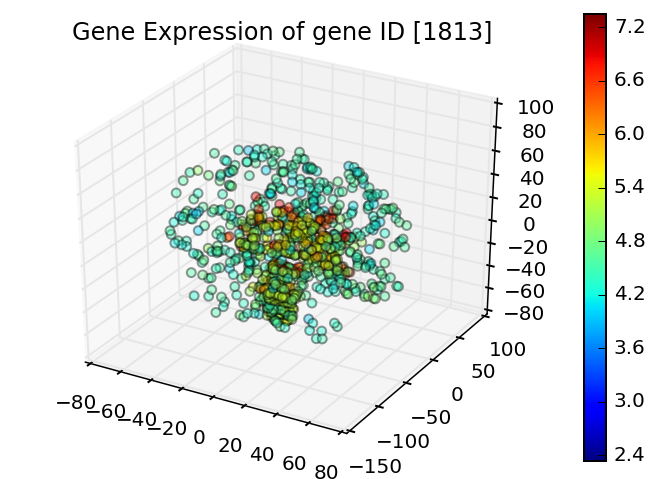

In [10]:
NV.visualize_ge([1813])

This may take a minute or two ...


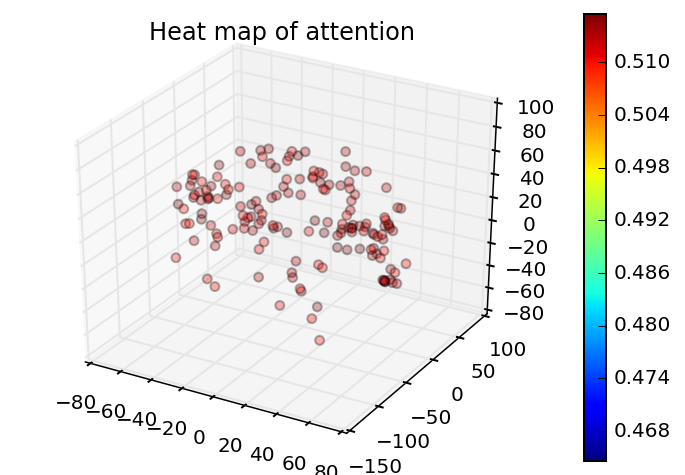

In [11]:
NV.visualize_ns('attention', alpha=.3)

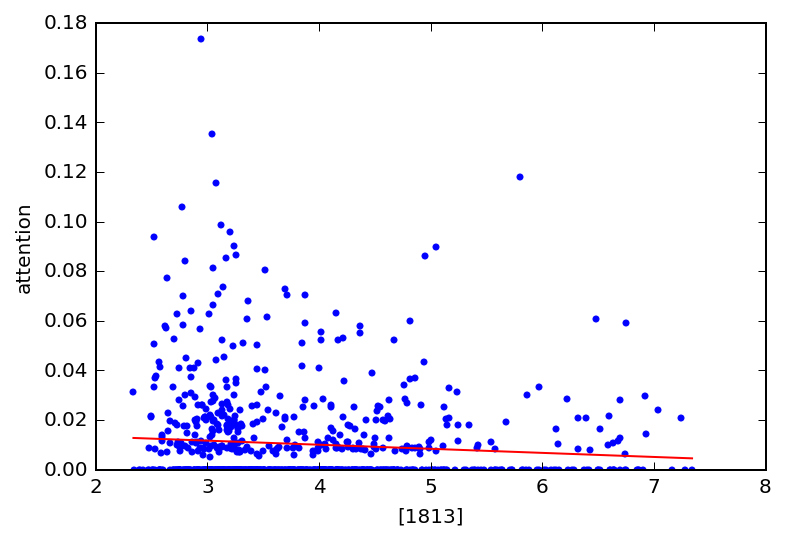

In [15]:
NV.lstsq_ns_ge('attention', [1813]);

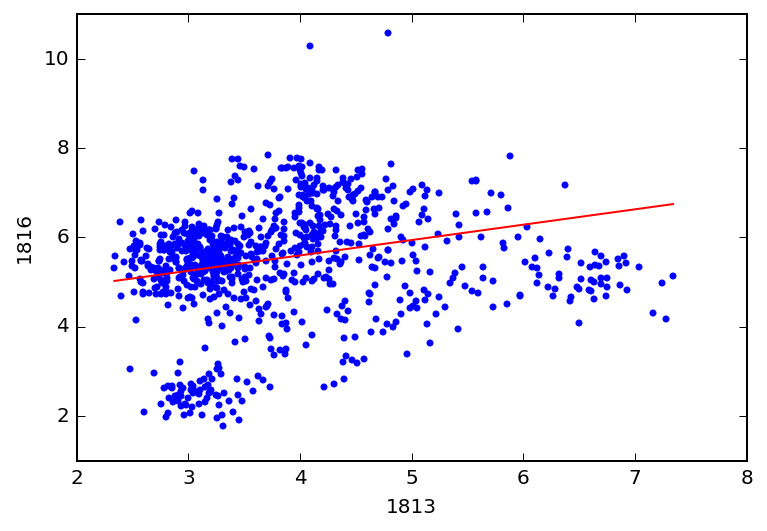

In [12]:
NV.lstsq_ge_ge(1813, 1816);

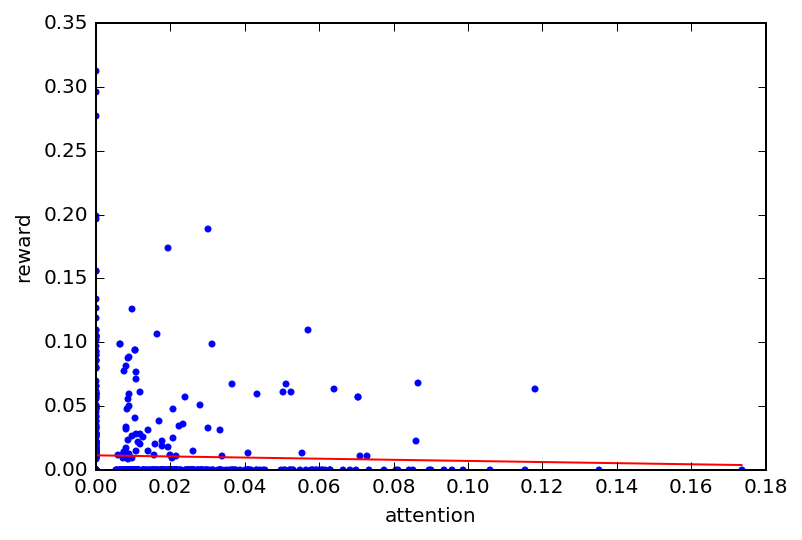

In [13]:
NV.lstsq_ns_ns('attention', 'reward');

In [14]:
A.matrix_builder(['reward'], [1813,1816,733])

array([[ 4.12595893,  7.18230856,  1.77019499,  0.02009134],
       [ 5.95393902,  6.01266839,  2.6129689 ,  0.03243104],
       [ 6.40373343,  5.73937413,  3.68978274,  0.11911968],
       ..., 
       [ 4.5307486 ,  5.48977971,  4.31693813,  0.        ],
       [ 4.40317201,  5.55840831,  3.85346407,  0.        ],
       [ 3.83733343,  5.63874741,  3.77839228,  0.        ]])